In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from geopy.geocoders import Nominatim
!pip install polars==0.18.4
!pip install summarytools
!pip install skimpy

  Using cached polars-0.18.4-cp37-abi3-win_amd64.whl.metadata (14 kB)
Using cached polars-0.18.4-cp37-abi3-win_amd64.whl (19.6 MB)
  Attempting uninstall: polars
    Found existing installation: polars 0.20.7
    Uninstalling polars-0.20.7:
      Successfully uninstalled polars-0.20.7


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.14 requires polars<0.21,>=0.19, but you have polars 0.18.4 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached polars-0.20.7-cp38-abi3-win_amd64.whl.metadata (15 kB)
Using cached polars-0.20.7-cp38-abi3-win_amd64.whl (25.6 MB)
  Attempting uninstall: polars
    Found existing installation: polars 0.18.4
    Uninstalling polars-0.18.4:
      Successfully uninstalled polars-0.18.4



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import polars as pl
import seaborn as sns

from summarytools import dfSummary
from skimpy import skim

In [3]:
import zipfile

zip_file_path = "car_dtls.zip"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:    
    excel_file_name = zip_ref.namelist()[0]  # Assuming the first file in the zip is the CSV
    with zip_ref.open(excel_file_name) as xlsx_file:
        data = pd.read_excel(xlsx_file)

In [4]:
df = data.copy()
data.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [5]:
df1 = data[['new_car_detail']]
df1.head()

,new_car_detail
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '..."
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '..."


In [6]:
df2 = data[["new_car_feature"]]
df2.head()

,new_car_feature
0,"{'heading': 'Features', 'top': [{'value': 'Pow..."
1,"{'heading': 'Features', 'top': [{'value': 'Pow..."
2,"{'heading': 'Features', 'top': [{'value': 'Pow..."
3,"{'heading': 'Features', 'top': [{'value': 'Pow..."
4,"{'heading': 'Features', 'top': [{'value': 'Pow..."


In [7]:
df3 = data[["new_car_overview"]]
df3.head()

,new_car_overview
0,"{'heading': 'Car overview', 'top': [{'key': 'R..."
1,"{'heading': 'Car overview', 'top': [{'key': 'R..."
2,"{'heading': 'Car overview', 'top': [{'key': 'R..."
3,"{'heading': 'Car overview', 'top': [{'key': 'R..."
4,"{'heading': 'Car overview', 'top': [{'key': 'R..."


In [8]:
df4 = data[["new_car_specs"]]
df4.head()

,new_car_specs
0,"{'heading': 'Specifications', 'top': [{'key': ..."
1,"{'heading': 'Specifications', 'top': [{'key': ..."
2,"{'heading': 'Specifications', 'top': [{'key': ..."
3,"{'heading': 'Specifications', 'top': [{'key': ..."
4,"{'heading': 'Specifications', 'top': [{'key': ..."


In [9]:
import pandas as pd
import ast

# Assuming 'df1' is your DataFrame

# Convert the string representation of the dictionary into an actual dictionary
df1['new_car_detail'] = df1['new_car_detail'].apply(ast.literal_eval)

# Normalize the dictionary to create multiple columns
df1_normalized = pd.json_normalize(df1['new_car_detail'])

# Display the final DataFrame
print(df1_normalized)


      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  centralVariantId  \
0       Hyundai        Hyundai i20       201

C:\Users\safyc\AppData\Local\Temp\ipykernel_22776\2327756792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['new_car_detail'] = df1['new_car_detail'].apply(ast.literal_eval)


In [10]:
import pandas as pd
import ast

# Assuming 'df2' is your DataFrame

# Convert the column 'new_car_feature' into string format
df2['new_car_feature'] = df2['new_car_feature'].astype(str)

# Define a function to extract values from nested dictionaries
def extract_values(feature_str):
    feature_dict = ast.literal_eval(feature_str)
    feature_list = feature_dict['top']
    return {feature['value']: 1 for feature in feature_list}

# Apply the function to create a DataFrame of extracted features
df2_extracted = df2['new_car_feature'].apply(extract_values).apply(pd.Series)

# Concatenate the extracted features with the original DataFrame
df2_final = pd.concat([df2, df2_extracted], axis=1)

# Drop the original 'new_car_feature' column
df2_final.drop(columns=['new_car_feature'], inplace=True)

# Display the final DataFrame
print(df2_final)


C:\Users\safyc\AppData\Local\Temp\ipykernel_22776\4239171479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_car_feature'] = df2['new_car_feature'].astype(str)


      Power Steering  Power Windows Front  Air Conditioner  Heater  \
0                1.0                  1.0              1.0     1.0   
1                1.0                  1.0              1.0     1.0   
2                1.0                  1.0              1.0     1.0   
3                1.0                  1.0              1.0     1.0   
4                1.0                  1.0              1.0     1.0   
...              ...                  ...              ...     ...   
1115             1.0                  1.0              1.0     1.0   
1116             NaN                  NaN              NaN     NaN   
1117             1.0                  1.0              1.0     1.0   
1118             NaN                  NaN              NaN     NaN   
1119             1.0                  1.0              1.0     1.0   

      Adjustable Head Lights  Fog Lights Front  Anti Lock Braking System  \
0                        1.0               1.0                       1.0   
1      

In [11]:
import pandas as pd
import ast

# Assuming 'df3' is your DataFrame

# Convert the column 'new_car_overview' into string format
df3['new_car_overview'] = df3['new_car_overview'].astype(str)

# Define a function to extract values from nested dictionaries
def extract_values(overview_str):
    overview_dict = ast.literal_eval(overview_str)
    overview_list = overview_dict['top']
    return {overview['key']: overview['value'] for overview in overview_list}

# Apply the function to create a DataFrame of extracted overview
df3_extracted = df3['new_car_overview'].apply(extract_values).apply(pd.Series)

# Concatenate the extracted overview with the original DataFrame
df3_final = pd.concat([df3, df3_extracted], axis=1)

# Drop the original 'new_car_overview' column
df3_final.drop(columns=['new_car_overview'], inplace=True)

# Display the final DataFrame
print(df3_final)


C:\Users\safyc\AppData\Local\Temp\ipykernel_22776\1721145355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['new_car_overview'] = df3['new_car_overview'].astype(str)


     Registration Year     Insurance Validity Fuel Type    Seats  \
0                 2015  Third Party insurance    Diesel  5 Seats   
1             Jan 2012            Third Party    Petrol  5 Seats   
2                 2016  Third Party insurance    Petrol  5 Seats   
3             Apr 2017  Third Party insurance    Petrol  5 Seats   
4                 2016  Third Party insurance    Petrol  5 Seats   
...                ...                    ...       ...      ...   
1115              2011  Third Party insurance    Petrol  5 Seats   
1116              2007  Third Party insurance    Petrol  5 Seats   
1117              2022  Third Party insurance    Petrol  5 Seats   
1118              2009  Third Party insurance    Petrol  5 Seats   
1119              2018  Third Party insurance    Petrol  5 Seats   

        Kms Driven   RTO     Ownership Engine Displacement Transmission  \
0     1,20,000 Kms  RJ13  Second Owner             1396 cc       Manual   
1       66,951 Kms  RJ14   First 

In [12]:
import pandas as pd
import ast

# Assuming 'df4' is your DataFrame

# Convert the column 'new_car_specs' into string format
df4['new_car_specs'] = df4['new_car_specs'].astype(str)

# Define a function to extract values from nested dictionaries
def extract_values(specs_str):
    specs_dict = ast.literal_eval(specs_str)
    specs_list = specs_dict['top']
    return {spec['key']: spec['value'] for spec in specs_list}

# Apply the function to create a DataFrame of extracted specs
df4_extracted = df4['new_car_specs'].apply(extract_values).apply(pd.Series)

# Concatenate the extracted specs with the original DataFrame
df4_final = pd.concat([df4, df4_extracted], axis=1)

# Drop the original 'new_car_specs' column
df4_final.drop(columns=['new_car_specs'], inplace=True)

# Display the final DataFrame
print(df4_final)


C:\Users\safyc\AppData\Local\Temp\ipykernel_22776\3851709518.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['new_car_specs'] = df4['new_car_specs'].astype(str)


         Mileage   Engine Max Power    Torque Wheel Size Seats
0     22.54 kmpl  1396 CC  88.73bhp   219.7Nm         16     5
1     22.38 kmpl  1197 CC  88.50bhp     113Nm        NaN     5
2      23.1 kmpl   998 CC  67.04bhp      90Nm        NaN     5
3      18.9 kmpl  1197 CC  81.86bhp  113.75nm        NaN     5
4     20.51 kmpl   998 CC     67bhp      90Nm        NaN     5
...          ...      ...       ...       ...        ...   ...
1115   18.6 kmpl  1199 CC   79.4bhp     108Nm         14     5
1116   19.7 kmpl   796 CC   46.3bhp      62Nm         12     5
1117  19.17 kmpl   999 CC  71.01bhp      96Nm         16     5
1118   19.7 kmpl   796 CC   46.3bhp      62Nm         12     5
1119   21.4 kmpl  1197 CC   83.1bhp     115Nm        NaN     5

[1120 rows x 6 columns]


In [13]:
# Concatenate the dataframes
merged_df = pd.concat([df1_normalized, df2_final, df3_final, df4_final], axis=1)

# Display the merged dataframe
print(merged_df)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...     Ownership  \
0       Hyundai        Hyundai i20       20

In [14]:
merged_df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Ownership,Engine Displacement,Transmission,Year of Manufacture,Mileage,Engine,Max Power,Torque,Wheel Size,Seats
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,Second Owner,1396 cc,Manual,2015.0,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,16,5
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,First Owner,1197 cc,Manual,2012.0,22.38 kmpl,1197 CC,88.50bhp,113Nm,NaN,5
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,Second Owner,998 cc,Automatic,2016.0,23.1 kmpl,998 CC,67.04bhp,90Nm,NaN,5
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,First Owner,1197 cc,Manual,2017.0,18.9 kmpl,1197 CC,81.86bhp,113.75nm,NaN,5
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,First Owner,998 cc,Automatic,2016.0,20.51 kmpl,998 CC,67bhp,90Nm,NaN,5


In [15]:
duplicate_columns = merged_df.columns[merged_df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

# Drop duplicate columns
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]


Duplicate columns: Index(['Seats'], dtype='object')


In [16]:
import polars as pl
import pandas as pd
import seaborn as sns
from summarytools import dfSummary
from skimpy import skim

In [17]:
df_pl = pl.from_pandas(merged_df)

In [18]:
dfSummary(merged_df)

C:\Users\safyc\anaconda3\Lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: invalid value encountered in scalar divide
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,it[int64],Mean (sd) : 0.0 (0.0)min < med < max:0.0 < 0.0 < 0.0IQR (CV) : 0.0 (nan),1 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABdElEQVR4nO3XMU5CQRiF0RlDEJr3QkhYDItwsS6C3RAzFIomMLZaGJWgcMk57bw/ucXXvNp7L3Dt7i49AH5icukBt6jWOi+lTE88f+u9v5xzzy0Q6pnVWufL5fJhGIbFKfe73e6p1voo1s+Een7TYRgW6/X6ZRzH/W8OW2uzzWaz2G6301KKUD8Q6h8Zx3G/Wq2eTzidn33MDfAzRQShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRJh890GtdVZKuf+HLbdiOB6Pk9ba7LeHrbXZ4XCYlFKGWusfTLtqr733/VeP76PYMRD1p5pCAAAAAElFTkSuQmCC"">",0(0.0%)
2,ft[object],1. Petrol2. Diesel3. Cng4. Electric5. Lpg,641 (57.2%)456 (40.7%)10 (0.9%)7 (0.6%)6 (0.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACGElEQVR4nO3bwWkbURhG0V9GhHgzQghcjItwsSlC3RjjWSQhG2URh1TgO0FzTgXP5qLRiPcdbrfbQOFh6wOwH2IjIzYyh5l5nJkvWx/kzv263W4/tj7E1o6Xy+VlWZbz1ge5Z+u6vh0Oh297D+64LMv5+fn5x+l0+rn1Ye7R+/v71+v1en59ff0yM/uObWbmdDr9fHp6+r71Ye7Y49YH+B94QSAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNznPlzDWbrg9wr/9t/juu6vl2v1/O4BvNp1nV9m5lfW59ja66FN1wLn5mD3SgVLwhk9v4Y9XgL7XpdZfXU2u26yuqpt/d1lZ97Ql4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyOx2XbXHv3lru15XWT21XAt3SzdjXUXGCwKZv4/R8Tjhsx0vl8vLzIyVEZ/tYVmW88eUb68vCUR8ZyMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3P8WBjNWBnxyVwLJ2NdRcYnGxmDFzIGL2T89EFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryNggkLGuIuOTjYx1FRnrKjJ++iAjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MtZVZGwQyFhXkfGdjYzYyPwGBJWujkZChVAAAAAASUVORK5CYII="">",0(0.0%)
3,bt[object],1. Hatchback2. Sedan3. SUV4. MUV5. Minivans6. Pickup Trucks7. Coupe,486 (43.4%)294 (26.2%)289 (25.8%)44 (3.9%)3 (0.3%)2 (0.2%)2 (0.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAChCAYAAADQgM1HAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACz0lEQVR4nO3bS2rbUACG0atg+pjYhECW0O4hi+hiuwgvonsIIRr0NXEHHRXSQEr8SVbPWcHFfOgio386nU4DCldLH4D/h9jIiI2M2MiIjcw0xng/xniz9EFW4ufpdPq29CG2andzc/Npv99fL32QNZjn+WGaps+CO4/dfr+/vru7+3Y4HL4vfZglPT4+vjsej9f39/dvxhhiO4PdGGMcDofvt7e3X5c+zAq8X/oAW+YFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcxujN+f1yx9kKX5Dc5vN8/zw/F4vB4+rxnzPD+MMX4ufY6t8ln4n3wWfkaTRTyVS3myeeJswEUMXgxRtmH1gxdDlO24lMHLf/+mvAX+1CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKrX1et+Wy8zEWsq6yetsEGgYx1FZlLeLJ5qm3E6tdVllXbsep1lWXVtlzCumq1b8m8jD91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyKx68LLWc/FvVj94MXbZDp+FkzF4IeMFgcxz16jri1f113WVVROv7cl1lVUT5/DcumqVf4VwubwgkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkXlyXWXVxDn8dV1l1cRr81k4GesqMl4QyFxN0/RxmiYvBJzd1Rjjwxjj7dIHYftco2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZK7GGF/GGD+WPgjbZ4NAxjVKRmxkxEbGuoqMdRUZ1ygZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxnrKjLWVWRco2TERsbghYzBCxnXKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxjVKRmxkxEZGbGTERuYXsYXo1mu2Sw8AAAAASUVORK5CYII="">",0(0.0%)
4,km[object],"1. 1,20,0002. 1,50,0003. 70,0004. 60,0005. 90,0006. 40,0007. 80,0008. 30,0009. 50,00010. 1,00,00011. other",112 (10.0%)57 (5.1%)54 (4.8%)49 (4.4%)48 (4.3%)46 (4.1%)44 (3.9%)42 (3.8%)38 (3.4%)36 (3.2%)594 (53.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD40lEQVR4nO3dQWobWQBF0a9GhM5Ewhi8GC+iF9uL0G6McQ06IRNlkKEllaV83QbnnLmEMJcqqvgv2RyPxwGFv/7vH8CfQ2xkxEZGbGTERkZsZMRGRmxkxEZmM8b4Osb48hvf8eN4PH6b9Hv4xLaPj4//7Ha7h1u/YFmW181m86/gWLPd7XYPz8/P3/b7/fdrP/z29vb34XB4eHl5+TLGEBsXbccYY7/ff396evrvxu/4OvH38Il

In [19]:
merged_df = merged_df.drop_duplicates()

In [20]:
skim(merged_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1099   │ │ float64     │ 56    │                                                          │
│ │ Number of columns │ 89     │ │ string      │ 29    │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA    ┃ NA %   ┃ mean  ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ it                       │     0 │      0 │     0 │     0 │     0 │     0 │     0 │     0 │     0 │     ▇  │  │
│ │ ownerNo                  │     0 │      0 │   1.5 │  0.79 │     0 │     1 │     1 │     2 │     5 │   ▇▃▁  │  │
│ │ modelYear                │     0 │      0 │  2000 │   4.4 │  2000 │  2000 │  2000 │  2000 │  2000 │  ▁▂▆▇▇ │  │
│ │ centralVariantId         │     0 │      0 │  4700 │  2600 │    30 │  2000 │  4300 │  6900 │ 11000 │ ▇▃▇▇▅▁ │  │
│ │ Power Steering           │    42 │   3.82 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Power Windows Front      │    94 │   8.55 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Air Conditioner          │    29 │   2.64 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Heater                   │    42 │   3.82 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Adjustable Head Lights   │   113 │  10.28 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Fog Lights Front         │   480 │  43.68 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Anti Lock Braking System │   300 │   27.3 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Centeral Locking         │   381 │  34.67 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Cd Player                │   592 │  53.87 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Power Adjustable         │   870 │  79.16 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Exterior Rear View       │       │        │       │       │       │       │       │       │       │        │  │
│ │ Mirror                   │       │        │       │       │       │       │       │       │       │        │  │
│ │ Brake Assist             │   824 │  74.98 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Radio                    │   744 │   67.7 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Manually Adjustable      │   861 │  78.34 │     1 │     0 │     1 │     1 │     1 │     1 │     1 │     ▇  │  │
│ │ Exterior Rear View       │       │        │       │       │       │       │       │       │       │        │  │
│ │ Mirror                   │       │        │       │       │       │       │       │       │       │        │  │
│ │ Child Safety Locks       │   985 │  89.63 │     1 │ 

In [21]:
data = merged_df[["bt","ownerNo","oem","model","price","Registration Year","Insurance Validity","Fuel Type","Kms Driven","Transmission","Mileage"]]

In [22]:
data.head()

,bt,ownerNo,oem,model,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
0,Hatchback,2,Hyundai,Hyundai i20,₹ 5.10 Lakh,2015,Third Party insurance,Diesel,"1,20,000 Kms",Manual,22.54 kmpl
1,Hatchback,1,Maruti,Maruti Swift,₹ 3.81 Lakh,Jan 2012,Third Party,Petrol,"66,951 Kms",Manual,22.38 kmpl
2,Hatchback,2,Maruti,Maruti Celerio,₹ 3.20 Lakh,2016,Third Party insurance,Petrol,"80,000 Kms",Automatic,23.1 kmpl
3,Hatchback,1,Hyundai,Hyundai Grand i10,₹ 4.20 Lakh,Apr 2017,Third Party insurance,Petrol,"44,392 Kms",Manual,18.9 kmpl
4,Hatchback,1,Maruti,Maruti Wagon R,₹ 3.50 Lakh,2016,Third Party insurance,Petrol,"40,000 Kms",Automatic,20.51 kmpl


In [23]:
data.columns.duplicated().sum()

0

In [24]:
data['bt'].unique()

array(['Hatchback', 'Sedan', 'SUV', 'MUV', 'Pickup Trucks', 'Minivans',
       'Coupe'], dtype=object)

In [25]:
data.isnull().sum()

bt                     0
ownerNo                0
oem                    0
model                  0
price                  0
Registration Year      7
Insurance Validity     0
Fuel Type              0
Kms Driven             1
Transmission           0
Mileage               28
dtype: int64

In [26]:
filtered_data = data.loc[data["Mileage"].isna()]
filtered_data

,bt,ownerNo,oem,model,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
17,SUV,1,Hyundai,Hyundai Creta,₹ 20 Lakh,2023,Third Party insurance,Petrol,200 Kms,Automatic,NaN
83,SUV,1,Kia,Kia Sonet,₹ 11.50 Lakh,Mar 2021,Comprehensive,Diesel,"62,000 Kms",Manual,NaN
100,SUV,1,BMW,BMW X3,₹ 90 Lakh,Aug 2023,Comprehensive,Petrol,300 Kms,Automatic,NaN
104,SUV,1,Hyundai,Hyundai Creta,₹ 18.50 Lakh,Apr 2022,Comprehensive,Diesel,"64,000 Kms",Automatic,NaN
264,MUV,1,Kia,Kia Carens,₹ 17.90 Lakh,Mar 2022,Comprehensive,Diesel,"15,285 Kms",Automatic,NaN
326,SUV,1,Kia,Kia Sonet,₹ 13.25 Lakh,Mar 2021,Comprehensive,Diesel,"45,204 Kms",Automatic,NaN
360,SUV,1,Mercedes-Benz,Mercedes-Benz AMG GLC 43,₹ 90 Lakh,Jul 2023,Comprehensive,Petrol,"23,200 Kms",Automatic,NaN
389,SUV,3,Hyundai,Hyundai Creta,₹ 15.74 Lakh,Jul 2021,Third Party,Petrol,"6,165 Kms",Automatic,NaN
419,Hatchback,1,Hyundai,Hyundai Santro,"₹ 65,000",NaN,Third Party insurance,Petrol,"70,000 Kms",Manual,NaN
440,SUV,1,Hyundai,Hyundai Kona,₹ 16 Lakh,2021,Third Party insurance,Electric,"75,000 Kms",Automatic,NaN


In [27]:
data = data.dropna(subset=['Mileage'])
data = data.dropna(subset=['Registration Year'])
data = data.dropna(subset=['Kms Driven'])

In [28]:
# data['Mileage'] = pd.to_numeric(data['Mileage'], errors='coerce')

In [29]:
data['model'].nunique()

167

In [30]:
data_num = data.copy()

In [31]:
data_num.head()

,bt,ownerNo,oem,model,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
0,Hatchback,2,Hyundai,Hyundai i20,₹ 5.10 Lakh,2015,Third Party insurance,Diesel,"1,20,000 Kms",Manual,22.54 kmpl
1,Hatchback,1,Maruti,Maruti Swift,₹ 3.81 Lakh,Jan 2012,Third Party,Petrol,"66,951 Kms",Manual,22.38 kmpl
2,Hatchback,2,Maruti,Maruti Celerio,₹ 3.20 Lakh,2016,Third Party insurance,Petrol,"80,000 Kms",Automatic,23.1 kmpl
3,Hatchback,1,Hyundai,Hyundai Grand i10,₹ 4.20 Lakh,Apr 2017,Third Party insurance,Petrol,"44,392 Kms",Manual,18.9 kmpl
4,Hatchback,1,Maruti,Maruti Wagon R,₹ 3.50 Lakh,2016,Third Party insurance,Petrol,"40,000 Kms",Automatic,20.51 kmpl


In [32]:
data_num['price'] = data_num['price'].str.extract('(\d+\.?\d*)').astype(float)
data_num['Registration Year'] = data_num['Registration Year'].str.extract('(\d+)')
data_num['Kms Driven'] = data_num['Kms Driven'].str.replace('[^\d]', '', regex=True)

# Convert the cleaned 'Kms Driven' column to float data type
data_num['Kms Driven'] = data_num['Kms Driven'].astype(float)

data_num['Mileage'] = data_num['Mileage'].str.extract(r'(\d+\.\d+)')

# Convert the extracted values to float
data_num['Mileage'] = data_num['Mileage'].astype(float)

In [33]:
data_num.head()

,bt,ownerNo,oem,model,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
0,Hatchback,2,Hyundai,Hyundai i20,5.10,2015,Third Party insurance,Diesel,120000.0,Manual,22.54
1,Hatchback,1,Maruti,Maruti Swift,3.81,2012,Third Party,Petrol,66951.0,Manual,22.38
2,Hatchback,2,Maruti,Maruti Celerio,3.20,2016,Third Party insurance,Petrol,80000.0,Automatic,23.10
3,Hatchback,1,Hyundai,Hyundai Grand i10,4.20,2017,Third Party insurance,Petrol,44392.0,Manual,18.90
4,Hatchback,1,Maruti,Maruti Wagon R,3.50,2016,Third Party insurance,Petrol,40000.0,Automatic,20.51


In [34]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 0 to 1119
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bt                  1066 non-null   object 
 1   ownerNo             1066 non-null   int64  
 2   oem                 1066 non-null   object 
 3   model               1066 non-null   object 
 4   price               1066 non-null   float64
 5   Registration Year   1066 non-null   object 
 6   Insurance Validity  1066 non-null   object 
 7   Fuel Type           1066 non-null   object 
 8   Kms Driven          1066 non-null   float64
 9   Transmission        1066 non-null   object 
 10  Mileage             937 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 99.9+ KB


In [35]:
data_num['price']=data_num['price']*100000

In [36]:
data_num.describe(include='all')

,bt,ownerNo,oem,model,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
count,1066,1066.000000,1066,1066,1.066000e+03,1066,1066,1066,1066.000000,1066,937.000000
unique,7,NaN,28,167,NaN,22,6,4,NaN,2,NaN
top,Hatchback,NaN,Maruti,Maruti Swift Dzire,NaN,2019,Third Party insurance,Petrol,NaN,Manual,NaN
freq,466,NaN,345,54,NaN,103,618,611,NaN,896,NaN
mean,NaN,1.497186,NaN,NaN,8.650028e+05,NaN,NaN,NaN,74609.217636,NaN,19.865848
std,NaN,0.781531,NaN,NaN,1.267904e+06,NaN,NaN,NaN,39585.760821,NaN,3.628297
min,NaN,1.000000,NaN,NaN,1.000000e+05,NaN,NaN,NaN,1782.000000,NaN,7.940000
25%,NaN,1.000000,NaN,NaN,3.300000e+05,NaN,NaN,NaN,44159.750000,NaN,17.400000
50%,NaN,1.000000,NaN,NaN,5.200000e+05,NaN,NaN,NaN,70000.000000,NaN,19.810000
75%,NaN,2.000000,NaN,NaN,8.250000e+05,NaN,NaN,NaN,100000.000000,NaN,22.100000


In [37]:
data_num['Mileage'].fillna(20, inplace=True)

In [38]:
data_num.loc[(data_num['oem'] == 'Maruti') & (data_num['Mileage'] > 25), 'Mileage'] = 22

In [39]:
data_num['price'] = pd.to_numeric(data_num['price'], errors='coerce')

In [40]:
data_num['Registration Year'] = pd.to_numeric(data_num['Registration Year'], errors='coerce')

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [42]:
data_num.isna().sum()

bt                    0
ownerNo               0
oem                   0
model                 0
price                 0
Registration Year     0
Insurance Validity    0
Fuel Type             0
Kms Driven            0
Transmission          0
Mileage               0
dtype: int64

In [71]:
data_num.head()

,bt,ownerNo,oem,model,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
0,Hatchback,2,Hyundai,Hyundai i20,510000.0,2015,Third Party insurance,Diesel,120000.0,Manual,22.54
1,Hatchback,1,Maruti,Maruti Swift,381000.0,2012,Third Party,Petrol,66951.0,Manual,22.38
2,Hatchback,2,Maruti,Maruti Celerio,320000.0,2016,Third Party insurance,Petrol,80000.0,Automatic,23.10
3,Hatchback,1,Hyundai,Hyundai Grand i10,420000.0,2017,Third Party insurance,Petrol,44392.0,Manual,18.90
4,Hatchback,1,Maruti,Maruti Wagon R,350000.0,2016,Third Party insurance,Petrol,40000.0,Automatic,20.51


### Relationship with Company & Price

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


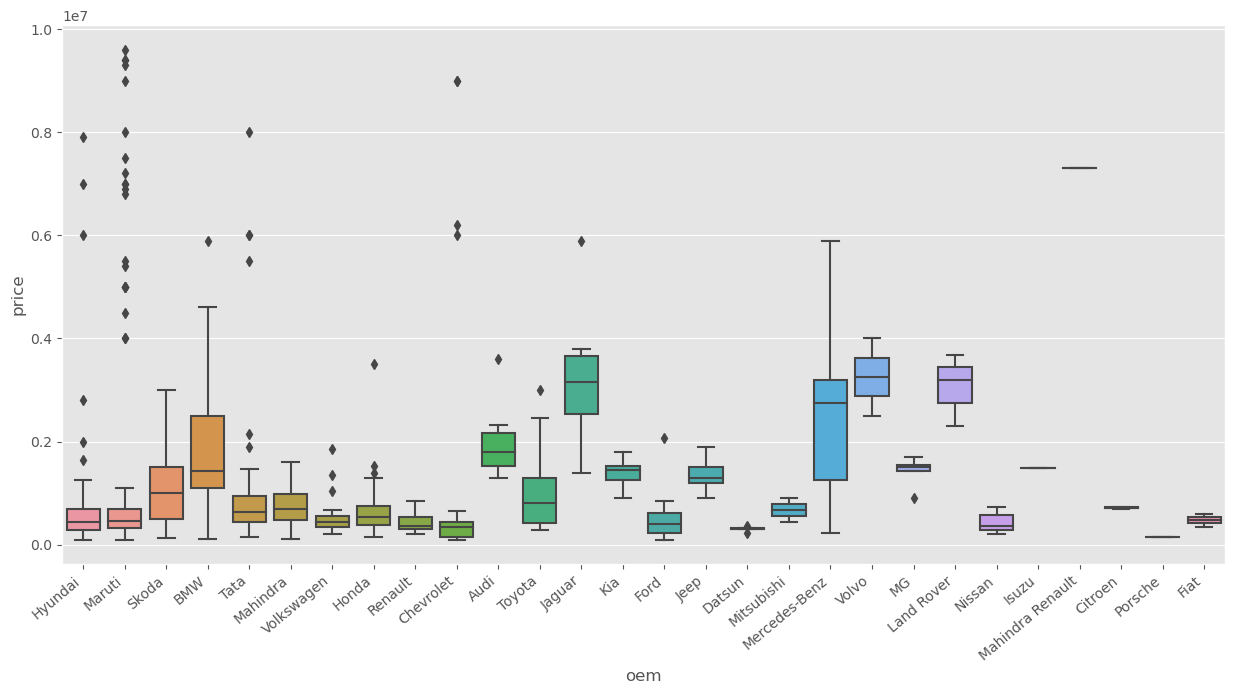

In [43]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='oem',y='price',data=data_num)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Relationship with Model & Mileage

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


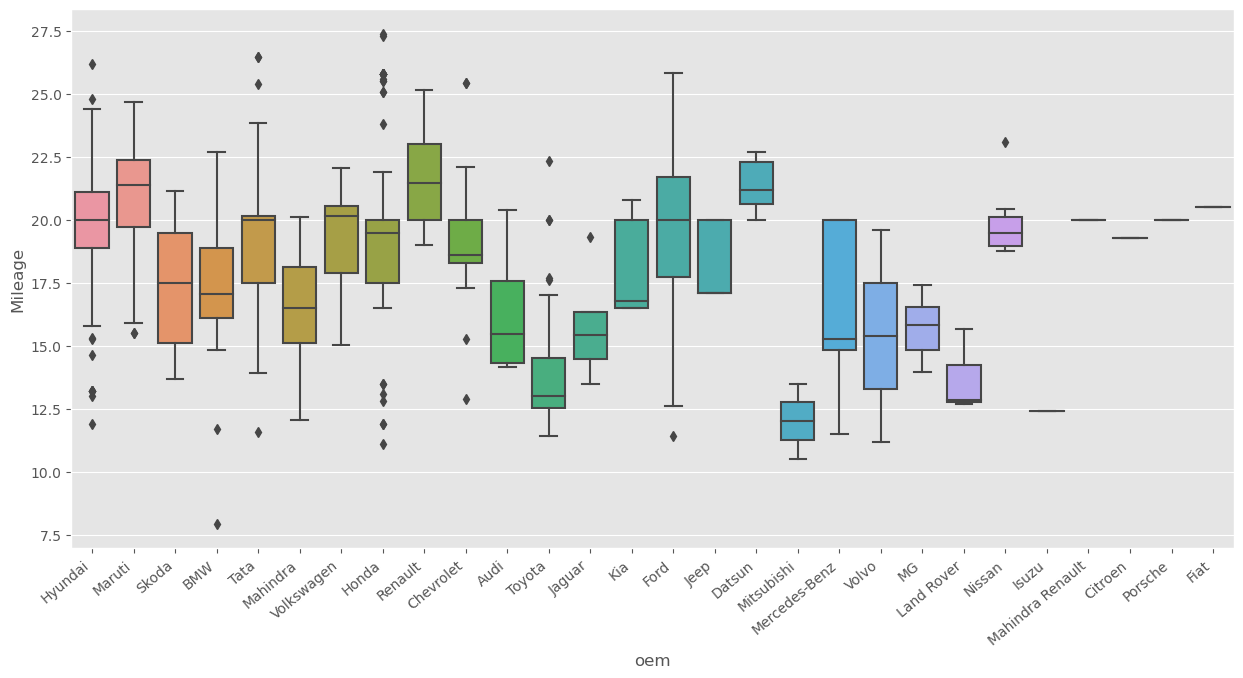

In [44]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='oem',y='Mileage',data=data_num)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Relationship with Year & Price

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


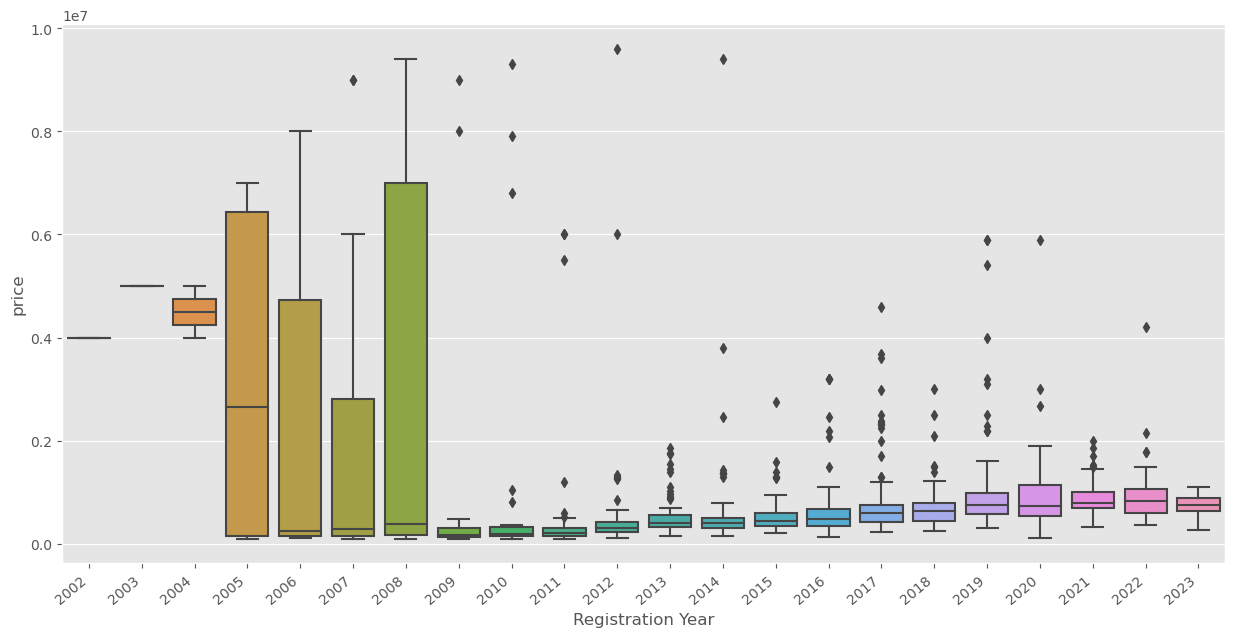

In [45]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Registration Year',y='price',data=data_num)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Relationship with Kms Driven and Price

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

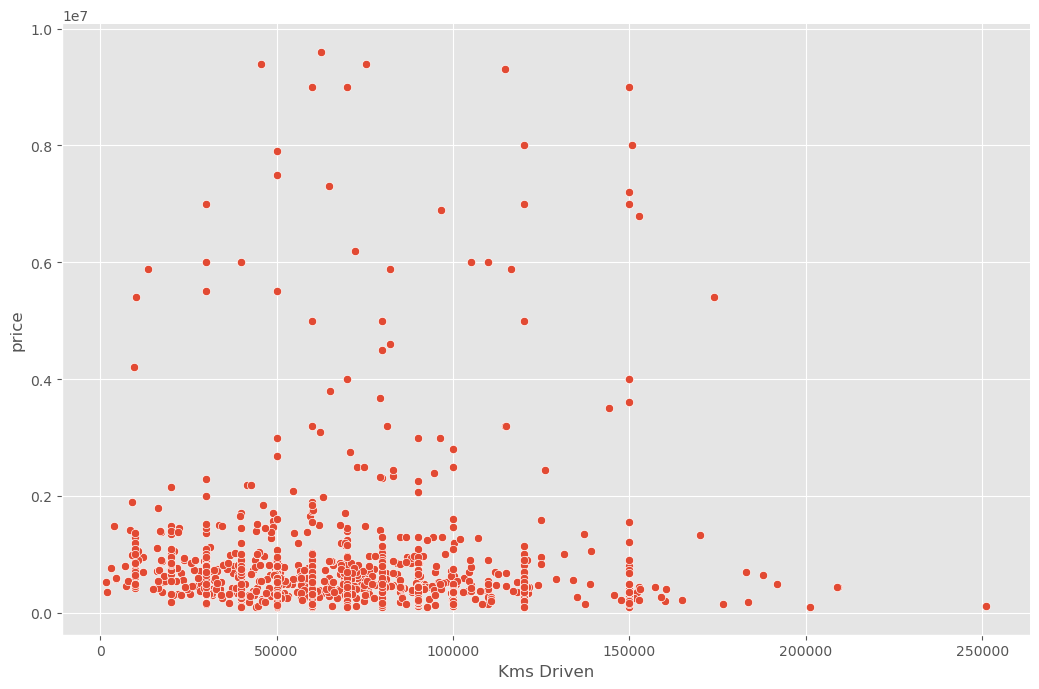

In [46]:
sns.relplot(x='Kms Driven',y='price',data=data_num,height=7,aspect=1.5)

### Relationship with Fuel type with Price

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Fuel Type', ylabel='price'>

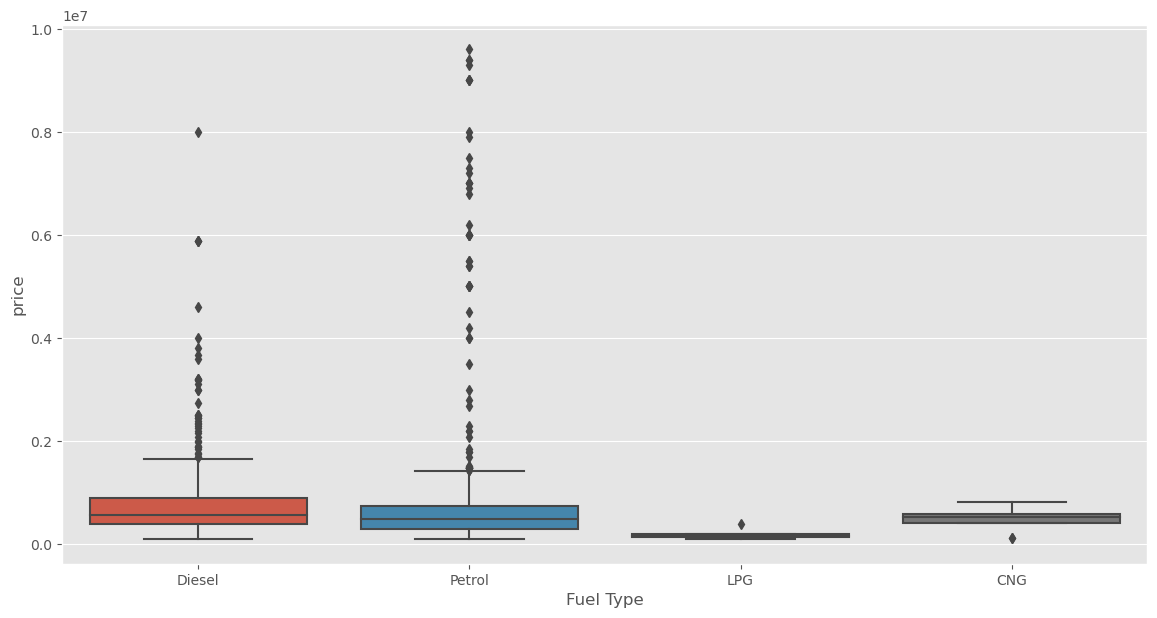

In [47]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel Type',y='price',data=data_num)

### Relationship with Transmission type

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Transmission', ylabel='price'>

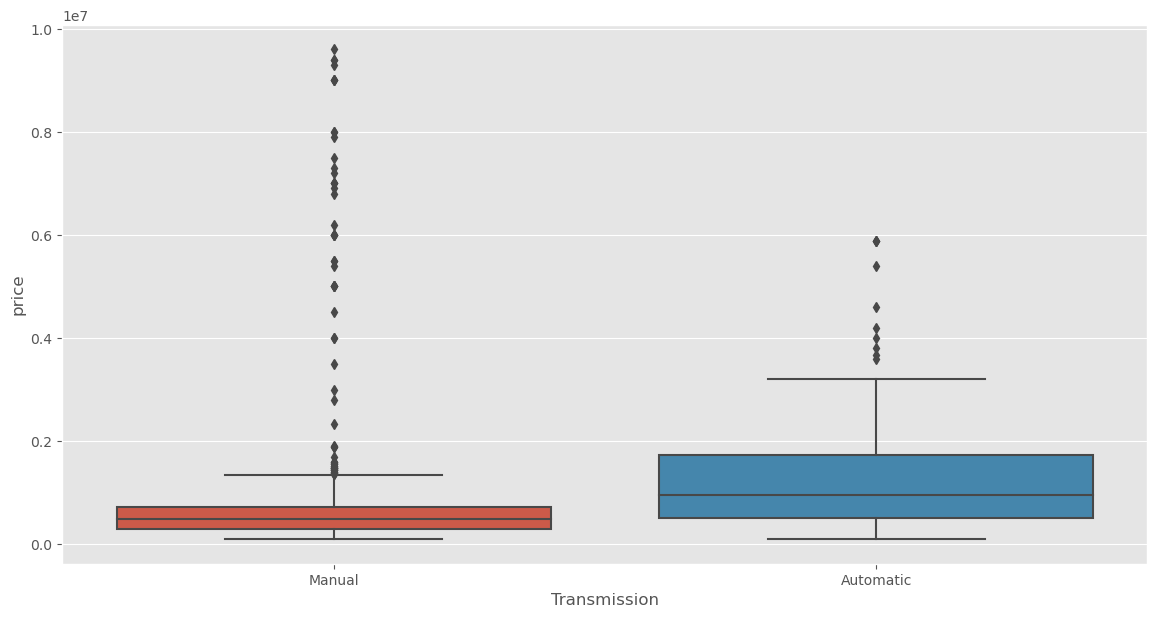

In [48]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Transmission',y='price',data=data_num)

### Relationship of Price with FuelType, Year and Company mixed

C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\safyc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

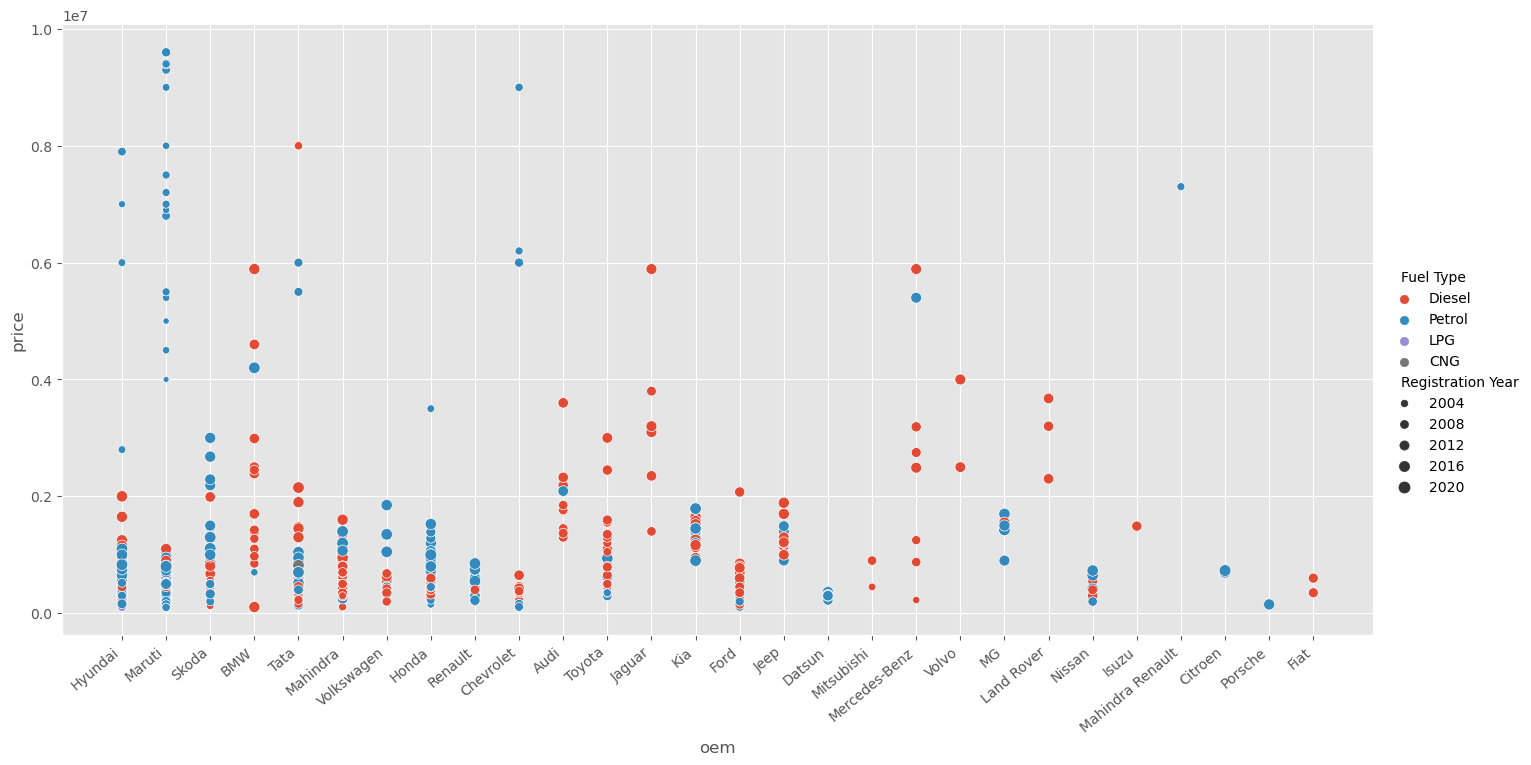

In [49]:
ax=sns.relplot(x='oem',y='price',data=data_num,hue='Fuel Type',size='Registration Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [77]:
data_num.head()

,bt,ownerNo,oem,model,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
0,Hatchback,2,Hyundai,Hyundai i20,510000.0,2015,Third Party insurance,Diesel,120000.0,Manual,22.54
1,Hatchback,1,Maruti,Maruti Swift,381000.0,2012,Third Party,Petrol,66951.0,Manual,22.38
2,Hatchback,2,Maruti,Maruti Celerio,320000.0,2016,Third Party insurance,Petrol,80000.0,Automatic,23.10
3,Hatchback,1,Hyundai,Hyundai Grand i10,420000.0,2017,Third Party insurance,Petrol,44392.0,Manual,18.90
4,Hatchback,1,Maruti,Maruti Wagon R,350000.0,2016,Third Party insurance,Petrol,40000.0,Automatic,20.51


In [79]:
final_data=data_num.drop(['model','oem'],axis=1)

In [80]:
final_data.head()

,bt,ownerNo,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
0,Hatchback,2,510000.0,2015,Third Party insurance,Diesel,120000.0,Manual,22.54
1,Hatchback,1,381000.0,2012,Third Party,Petrol,66951.0,Manual,22.38
2,Hatchback,2,320000.0,2016,Third Party insurance,Petrol,80000.0,Automatic,23.10
3,Hatchback,1,420000.0,2017,Third Party insurance,Petrol,44392.0,Manual,18.90
4,Hatchback,1,350000.0,2016,Third Party insurance,Petrol,40000.0,Automatic,20.51


In [82]:
print(final_data['bt'].unique())
print(final_data['Insurance Validity'].unique())
print(final_data['Fuel Type'].unique())
print(final_data['Transmission'].unique())

['Hatchback' 'Sedan' 'SUV' 'MUV' 'Pickup Trucks' 'Minivans' 'Coupe']
['Third Party insurance' 'Third Party' 'Comprehensive' 'Zero Dep'
 'Not Available' '1']
['Diesel' 'Petrol' 'LPG' 'CNG']
['Manual' 'Automatic']


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_data['bt']=le.fit_transform(final_data['bt'])
final_data['Insurance Validity']=le.fit_transform(final_data['Insurance Validity'])
final_data['Fuel Type']=le.fit_transform(final_data['Fuel Type'])
final_data['Transmission']=le.fit_transform(final_data['Transmission'])

In [89]:
final_data.head()

,bt,ownerNo,price,Registration Year,Insurance Validity,Fuel Type,Kms Driven,Transmission,Mileage
0,1,2,510000.0,2015,4,1,120000.0,1,22.54
1,1,1,381000.0,2012,3,3,66951.0,1,22.38
2,1,2,320000.0,2016,4,3,80000.0,0,23.10
3,1,1,420000.0,2017,4,3,44392.0,1,18.90
4,1,1,350000.0,2016,4,3,40000.0,0,20.51


In [108]:
print(data_num['bt'].unique())
print(final_data['bt'].unique())

['Hatchback' 'Sedan' 'SUV' 'MUV' 'Pickup Trucks' 'Minivans' 'Coupe']
[1 6 5 2 4 3 0]


In [109]:
print(data_num['Fuel Type'].unique())
print(final_data['Fuel Type'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
[1 3 2 0]


In [132]:
print(data['Transmission'].unique())
print(final_data['Transmission'].unique())

['Manual' 'Automatic']
[1 0]


In [140]:
final_data['ownerNo'].unique()

array([2, 1, 3, 5, 4], dtype=int64)

In [141]:
final_data['Registration Year'].unique()

array([2015, 2012, 2016, 2017, 2007, 2011, 2014, 2013, 2020, 2019, 2021,
       2018, 2022, 2010, 2009, 2023, 2006, 2008, 2005, 2004, 2003, 2002],
      dtype=int64)

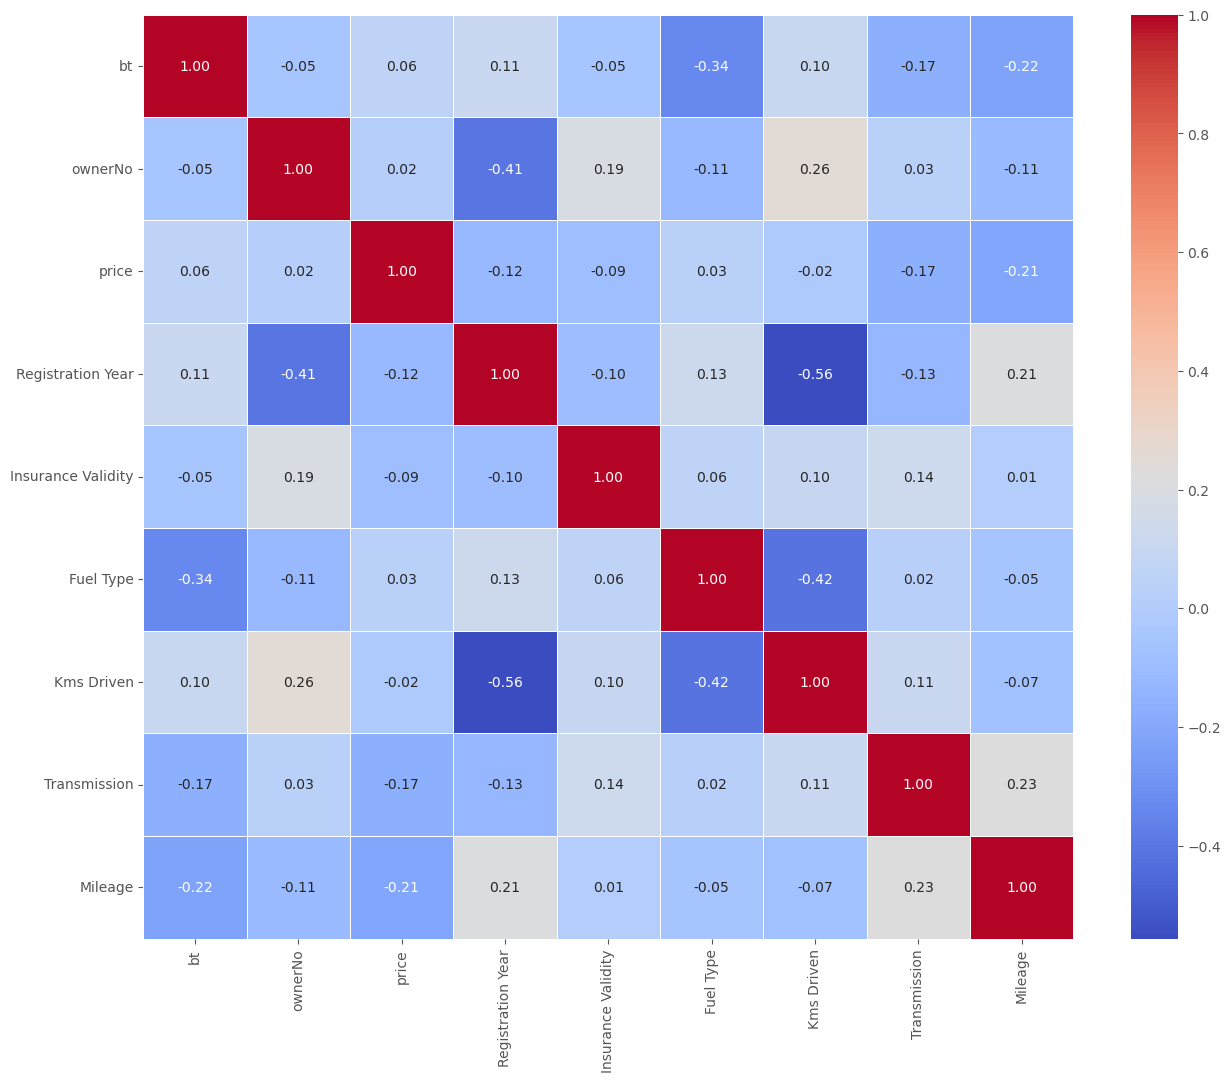

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = final_data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

In [97]:
# Extract correlations with the 'Class' variable
correlations_with_class = correlation_matrix['price'].sort_values(ascending=False)

# Show correlations with the 'Class' variable
print(correlations_with_class)

price                 1.000000
bt                    0.062857
Fuel Type             0.032191
ownerNo               0.017181
Kms Driven           -0.020764
Insurance Validity   -0.089305
Registration Year    -0.117967
Transmission         -0.165908
Mileage              -0.214947
Name: price, dtype: float64


## Extracting Training Data

In [120]:
x = final_data.drop(['price','Insurance Validity'], axis=1)
y = data_num['price']

In [121]:
x.isna().sum()

bt                   0
ownerNo              0
Registration Year    0
Fuel Type            0
Kms Driven           0
Transmission         0
Mileage              0
dtype: int64

In [122]:
y.shape

(1066,)

## Linear Regression

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

# Define the pipeline
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

# Fit the scaler only on the training data
pipeline.fit(x_train)

# Transform both the training and test data using the fitted scaler
x_train_scaled = pipeline.transform(x_train)
x_test_scaled = pipeline.transform(x_test)

# Instantiate the model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1312308985820.4255
R^2 Score: -0.010578892850940935
Mean Absolute Error: 633007.8499105278


In [134]:
x.columns

Index(['bt', 'ownerNo', 'Registration Year', 'Fuel Type', 'Kms Driven',
       'Transmission', 'Mileage'],
      dtype='object')

In [135]:
# Predict using the provided values
input_values = [[1, 3, 2020, 1, 100000, 0, 22]]
input_values_scaled = pipeline.transform(input_values)
prediction = model.predict(input_values_scaled)
print(f"Predicted output: {prediction}")

Predicted output: [639208.39140283]


C:\Users\safyc\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [136]:
import pickle
with open("carPrice_pkl","wb") as files:
    pickle.dump(model, files)

In [137]:
from IPython.display import FileLink

# Replace "rent_pkl" with the actual filename you want to download
FileLink(r'carPrice_pkl')

C:\Users\safyc\Guvi\Projects\CarPrice Prediction\carPrice_pkl

In [138]:
import pickle
with open("CarPipeline_pkl","wb") as files:
    pickle.dump(pipeline, files)

In [139]:
from IPython.display import FileLink

# Replace "rent_pkl" with the actual filename you want to download
FileLink(r'CarPipeline_pkl')

C:\Users\safyc\Guvi\Projects\CarPrice Prediction\CarPipeline_pkl

### Decision Tree

In [126]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model (Decision Tree Regressor)
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2738876738243.862
R^2 Score: -0.5793526265049653
Mean Absolute Error: 537088.6392009987


### SVM

In [128]:
from sklearn.svm import SVR

# Instantiate the model (Support Vector Machine Regressor)
svm_regressor = SVR()

# Fit the model on the training data
svm_regressor.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1839089107846.2651
R^2 Score: -0.0604968716905645
Mean Absolute Error: 533767.8147397207


### Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model (Random Forest Regressor)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1700899018861.7378
R^2 Score: 0.019189401498424852
Mean Absolute Error: 501582.7035848047


### Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model (Gradient Boosting Regressor)
grd_boost = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
grd_boost.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = grd_boost.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1482414048135.9055
R^2 Score: 0.14517711301148684
Mean Absolute Error: 509264.3199348637
